In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df_flight=pd.read_csv("Merged_weather_flight.csv",index_col=0)

In [3]:
df_flight.head()

,windspeedKmph,windspeedMiles,WindGustKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,...,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
0,18,11,28,315,122,0.0,10,1024,100,38,...,0,600,700,6,10397,13204,700,0,8,1
1,18,11,28,315,122,0.0,10,1024,100,38,...,0,600,800,1,10397,14100,800,0,0,1
2,18,11,26,317,122,0.0,10,1024,100,38,...,0,700,1000,0,10397,14747,900,0,0,1
3,18,11,26,317,122,0.0,10,1024,100,38,...,0,700,900,0,10397,13303,900,0,1,1
4,18,11,26,317,122,0.0,10,1024,100,38,...,0,700,900,10,10397,14771,900,0,3,1


In [4]:
df_flight.columns

Index(['windspeedKmph', 'windspeedMiles', 'WindGustKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'tempF', 'WindChillF', 'humidity', 'time', 'date',
       'airport', 'Origin', 'Dest', 'FlightDate', 'DepTime', 'DepDel15',
       'CRSDepTime', 'CRSArrTime', 'DepDelayMinutes', 'OriginAirportID',
       'DestAirportID', 'ArrTime', 'ArrDel15', 'ArrDelayMinutes', 'Month'],
      dtype='object')

In [5]:
correlation=df_flight.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_76670/1434233212.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df_flight.corr()
/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_76670/1434233212.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap='coolwarm').set_precision(2)


,windspeedKmph,windspeedMiles,WindGustKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,tempF,WindChillF,humidity,time,DepTime,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
windspeedKmph,1.00,1.00,0.90,0.14,0.07,0.09,0.04,-0.20,0.11,-0.20,-0.15,-0.18,-0.06,0.03,0.03,0.06,0.02,0.05,0.05,-0.01,0.00,0.05,0.06,0.05,-0.15
windspeedMiles,1.00,1.00,0.90,0.14,0.07,0.09,0.04,-0.20,0.11,-0.20,-0.15,-0.18,-0.06,0.03,0.03,0.06,0.02,0.05,0.05,-0.01,0.00,0.05,0.06,0.05,-0.15
WindGustKmph,0.90,0.90,1.00,0.12,0.13,0.17,-0.02,-0.21,0.16,-0.23,-0.24,-0.26,0.05,0.06,0.06,0.08,0.06,0.05,0.08,0.11,0.01,0.04,0.09,0.08,-0.15
winddirDegree,0.14,0.14,0.12,1.00,-0.07,-0.07,0.05,-0.12,-0.13,-0.09,-0.06,-0.07,-0.07,0.01,0.01,0.01,0.01,0.00,0.01,-0.07,0.00,-0.00,0.01,0.01,-0.08
weatherCode,0.07,0.07,0.13,-0.07,1.00,0.53,-0.35,-0.19,0.48,0.26,0.09,0.09,0.29,0.07,0.07,0.13,0.06,0.04,0.10,-0.06,0.00,0.03,0.15,0.12,-0.10
precipMM,0.09,0.09,0.17,-0.07,0.53,1.00,-0.32,-0.14,0.31,0.17,0.03,0.03,0.27,0.06,0.06,0.11,0.06,0.04,0.10,-0.09,-0.00,0.02,0.12,0.10,-0.05
visibility,0.04,0.04,-0.02,0.05,-0.35,-0.32,1.00,0.06,-0.37,-0.04,0.15,0.14,-0.41,0.07,0.07,-0.04,0.07,0.06,-0.04,-0.02,-0.00,0.07,-0.05,-0.05,0.12
pressure,-0.20,-0.20,-0.21,-0.12,-0.19,-0.14,0.06,1.00,-0.09,-0.27,-0.37,-0.37,0.14,-0.10,-0.10,-0.08,-0.10,-0.10,-0.06,-0.19,-0.01,-0.09,-0.10,-0.07,0.04
cloudcover,0.11,0.11,0.16,-0.13,0.48,0.31,-0.37,-0.09,1.00,0.11,-0.12,-0.12,0.45,-0.00,-0.00,0.06,-0.01,-0.01,0.05,-0.07,-0.00,-0.01,0.07,0.06,-0.11
DewPointF,-0.20,-0.20,-0.23,-0.09,0.26,0.17,-0.04,-0.27,0.11,1.00,0.82,0.82,0.17,0.04,0.04,0.03,0.05,-0.02,0.03,-0.46,-0.03,-0.02,0.03,0.03,0.15


In [6]:
columns1=["weatherCode","precipMM","visibility","cloudcover","humidity"]

In [7]:
df1=df_flight[columns1]

In [8]:
correlation=df1.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_76670/3080711126.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap='coolwarm').set_precision(2)


,weatherCode,precipMM,visibility,cloudcover,humidity
weatherCode,1.00,0.53,-0.35,0.48,0.29
precipMM,0.53,1.00,-0.32,0.31,0.27
visibility,-0.35,-0.32,1.00,-0.37,-0.41
cloudcover,0.48,0.31,-0.37,1.00,0.45
humidity,0.29,0.27,-0.41,0.45,1.00


In [9]:

# Step 1: Create a StandardScaler object
scaler = StandardScaler()

# Step 2: Fit the scaler to the data
scaler.fit(df1)

# Step 3: Transform the data using the scaler
df1= pd.DataFrame(scaler.transform(df1), columns=df1.columns)


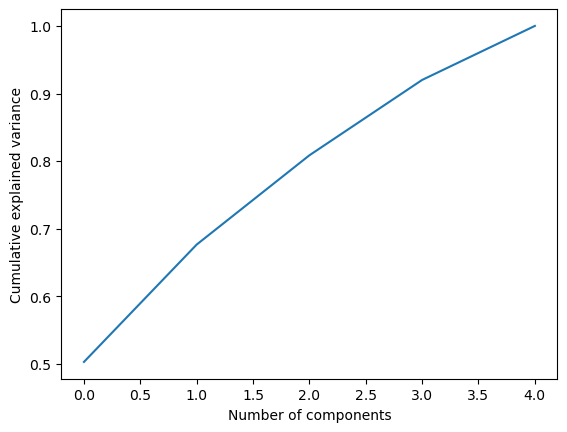

In [10]:
from sklearn.decomposition import PCA

# Step 1: Create a PCA object and fit it to the data
pca = PCA().fit(df1)

# Step 2: Plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

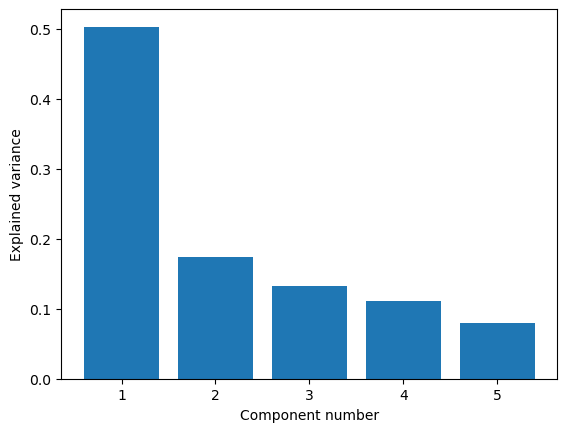

In [11]:
# Step 3: Plot the cumulative explained variance plot
plt.bar(height=pca.explained_variance_ratio_,x=[1,2,3,4,5])
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

In [12]:
from sklearn.decomposition import PCA



# Step 1: Create a PCA object and fit it to the data
pca = PCA(n_components=3)
pca.fit(df1)

# Step 2: Transform the data using the PCA object
df1 = pd.DataFrame(pca.transform(df1),columns=["Component1","Component2","Component3"])

In [13]:
df1

,Component1,Component2,Component3
0,0.938473,-1.451668,-1.273089
1,0.938473,-1.451668,-1.273089
2,0.938473,-1.451668,-1.273089
3,0.938473,-1.451668,-1.273089
4,0.938473,-1.451668,-1.273089
...,...,...,...
1048570,1.384142,-1.956758,2.023734
1048571,1.384142,-1.956758,2.023734
1048572,1.384142,-1.956758,2.023734
1048573,1.384142,-1.956758,2.023734


In [14]:
columns2=["DewPointF","WindChillF","tempF"]

In [15]:
df2=df_flight[columns2]

In [16]:
correlation=df2.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_76670/290764112.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap='coolwarm').set_precision(2)


,DewPointF,WindChillF,tempF
DewPointF,1.00,0.82,0.82
WindChillF,0.82,1.00,0.99
tempF,0.82,0.99,1.00


In [17]:

# Step 1: Create a StandardScaler object
scaler = StandardScaler()

# Step 2: Fit the scaler to the data
scaler.fit(df2)

# Step 3: Transform the data using the scaler
df2= pd.DataFrame(scaler.transform(df2), columns=df2.columns)


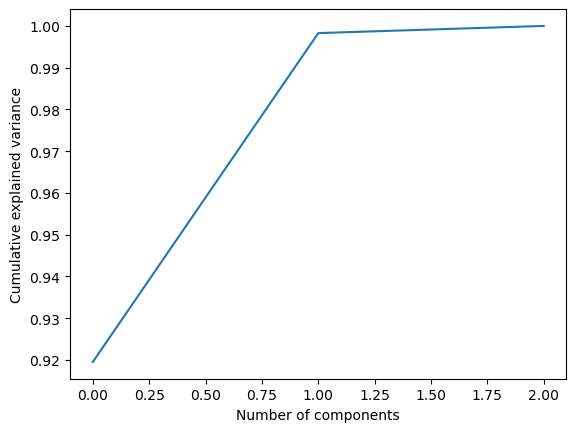

In [18]:
# Step 1: Create a PCA object and fit it to the data
pca = PCA().fit(df2)

# Step 2: Plot the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

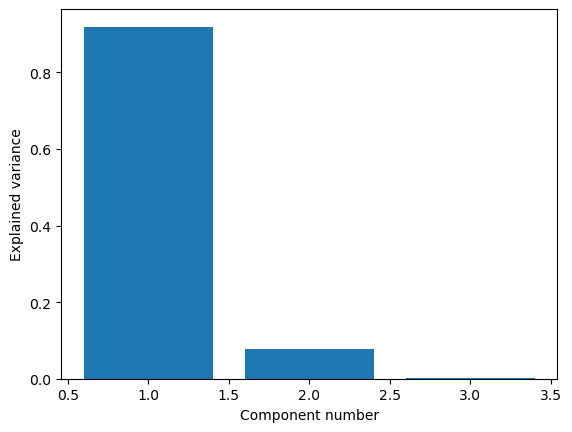

In [19]:
# Step 3: Plot the cumulative explained variance plot
plt.bar(height=pca.explained_variance_ratio_,x=[1,2,3])
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.show()

In [20]:
from sklearn.decomposition import PCA

# Step 1: Create a PCA object and fit it to the data
pca = PCA(n_components=1)
pca.fit(df2)

# Step 2: Transform the data using the PCA object
df2 = pd.DataFrame(pca.transform(df2),columns=["Component4"])

In [21]:
df2

,Component4
0,2.193691
1,2.193691
2,2.129359
3,2.129359
4,2.129359
...,...
1048570,2.362956
1048571,2.362956
1048572,2.362956
1048573,2.362956


Columns to be Eliminated:

| Feature | Reason to Eliminate |
| :- |  :-: |
| WindSpeedMiles, WindGustKmph| High correlation to WindSpeedKmph |
| CRSArrTime, ArrTime, ArrDelay15|Directly Related to Target Variable |
|WeatherCode,precipMM,visibility,cloudcover,humidity| Reduced by PCA|
|DewPointF,WindChillF,tempF| Reduced by PCA|
|OriginAirportID,DestAirportID| Same as Origin,Dest|
|airport| Same as Origin|
|FlightDate,date| Extracted as Month|

In [22]:
drop_columns=["airport","date","FlightDate","OriginAirportID","DestAirportID","windspeedMiles","WindGustKmph","weatherCode","precipMM","visibility","cloudcover","humidity","CRSArrTime","ArrTime","ArrDel15","DewPointF","WindChillF","tempF"]

In [23]:
df_flight.drop(columns=drop_columns,inplace=True)

In [24]:
df_final=pd.concat([df_flight,df1,df2],axis=1)

In [25]:
df_final=df_final[df_final["ArrDelayMinutes"]>=0]

In [26]:
target=['ArrDelayMinutes']

In [27]:
features=['windspeedKmph', 'winddirDegree', 'pressure', 'time',
       'Origin', 'Dest', 'DepTime', 'DepDel15', 'CRSDepTime',
       'DepDelayMinutes', 'Month', 'Component1',
       'Component2', 'Component3', 'Component4']

In [28]:
from sklearn.preprocessing import LabelEncoder

X=df_final[features]
Y=df_final[target]


In [29]:
X

,windspeedKmph,winddirDegree,pressure,time,Origin,Dest,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,Month,Component1,Component2,Component3,Component4
0,18,315,1024,600,ATL,MCO,600,0,600,6,1,0.938473,-1.451668,-1.273089,2.193691
1,18,315,1024,600,ATL,PHL,600,0,600,1,1,0.938473,-1.451668,-1.273089,2.193691
2,18,317,1024,700,ATL,SEA,700,0,700,0,1,0.938473,-1.451668,-1.273089,2.129359
3,18,317,1024,700,ATL,MIA,700,0,700,0,1,0.938473,-1.451668,-1.273089,2.129359
4,18,317,1024,700,ATL,SFO,700,0,700,10,1,0.938473,-1.451668,-1.273089,2.129359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,7,215,1009,1700,DEN,LAX,1700,1,1600,17,1,1.384142,-1.956758,2.023734,2.362956
1048571,7,215,1009,1700,DEN,LAS,1700,0,1700,2,1,1.384142,-1.956758,2.023734,2.362956
1048572,7,215,1009,1700,DEN,DFW,1700,0,1700,0,1,1.384142,-1.956758,2.023734,2.362956
1048573,7,215,1009,1700,DEN,PDX,1700,0,1700,9,1,1.384142,-1.956758,2.023734,2.362956


In [30]:
encoder=LabelEncoder()
X["Origin"]=encoder.fit_transform(X["Origin"])
X["Dest"]=encoder.fit_transform(X["Dest"])

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_76670/3705347271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Origin"]=encoder.fit_transform(X["Origin"])
/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_76670/3705347271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Dest"]=encoder.fit_transform(X["Dest"])


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

# create a linear regression model and fit the data
model = LinearRegression()
model.fit(X_train,Y_train)


from sklearn.metrics import r2_score, mean_squared_error

# Predict the target values for the test set
linear_reg_pred = model.predict(X_test)

In [33]:
# Calculate the metrics
r2 = r2_score(Y_test, linear_reg_pred)
mse = mean_squared_error(Y_test, linear_reg_pred)
rmse = np.sqrt(mse)

# Print the metrics
print('R2 score:', r2)
print('MSE:', mse)
print('RMSE:', rmse)

R2 score: 0.9469113010676172
MSE: 71.34788292526686
RMSE: 8.446767602181728


In [34]:
from sklearn.ensemble import RandomForestRegressor


# create a Random Forest Regressor object with 50 trees
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)

# fit the training data to the model
rf_regressor.fit(X_train, Y_train)

# predict the target values for the test set
rf_pred = rf_regressor.predict(X_test)

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_76670/2069509693.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, Y_train)


In [35]:
# calculate the metrics
mse = mean_squared_error(Y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, rf_pred)

# print the metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 67.65235783069227
RMSE: 8.225105338577267
R2 Score: 0.9496610759887377


In [36]:
from sklearn.neighbors import KNeighborsRegressor

# create a KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=10)

# fit the training data to the model
knn_regressor.fit(X_train, Y_train)

# predict the target values for the test set
KNN_pred = knn_regressor.predict(X_test)

In [37]:
# calculate the metrics
mse = mean_squared_error(Y_test, KNN_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, KNN_pred)

# print the metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 81.84810346088189
RMSE: 9.046994167174084
R2 Score: 0.9390982725111459


In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define the model architecture
model = Sequential()
model.add(Dense(15, input_dim=15, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the training data to the model
model.fit(X_train, Y_train, epochs=5,validation_split=0.3)

# predict the target values for the test set
NN_pred = model.predict(X_test)

2023-04-17 22:24:20.862948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5


2023-04-17 22:24:23.517725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


16057/16057 [==============================] - 10s 610us/step - loss: 138.4952 - val_loss: 77.1793
Epoch 2/5
16057/16057 [==============================] - 10s 608us/step - loss: 77.9974 - val_loss: 72.7915
Epoch 3/5
16057/16057 [==============================] - 10s 610us/step - loss: 75.1442 - val_loss: 74.9781
Epoch 4/5
16057/16057 [==============================] - 10s 607us/step - loss: 73.8648 - val_loss: 72.8428
Epoch 5/5
9831/9831 [==============================] - 3s 271us/step


In [39]:
# calculate the metrics
mse = mean_squared_error(Y_test, NN_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, NN_pred)

# print the metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 70.90687718583733
RMSE: 8.420622137694894
R2 Score: 0.9472394456455377


In [ ]:
from sklearn.svm import SVR

# create an SVM Regressor object
svm_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

# fit the training data to the model
svm_regressor.fit(X_train, Y_train)

# predict the target values for the test set
SVM_pred = svm_regressor.predict(X_test)

/Users/omii/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# calculate the metrics
mse = mean_squared_error(Y_test, SVM_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, SVM_pred)

# print the metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
